# 2.4

TODO write about https://www.youtube.com/watch?v=HdlDYng8g9s

In [18]:
import pandas
import numpy
from cardio_datasets import (
    all_features_dataset,
    categorial_data_set,
    continuous_dataset,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [19]:
def create_X_y_from_data_frame(data_frame: pandas.DataFrame, target_column: str):
    """Takes a pandas DataFrame and string of target column and returns X, y"""
    return data_frame.drop(columns=[target_column]), data_frame[target_column]

## Search and score parameters

In [20]:
def score_hyper_parameters(model, param_grid:dict, data_frame:pandas.DataFrame, target_column:str):
    # TODO """"""
    X, y = create_X_y_from_data_frame(data_frame, target_column)
    clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, return_train_score=False)
    clf.fit(X,y)
    return pandas.DataFrame(clf.cv_results_)

In [21]:
def select_search_parameters_and_scores(results_data_frame:pandas.DataFrame, param_grid:dict):
    # TODO """"""
    columns = ['param_' + key for key in list(param_grid.keys())] + ['mean_test_score', 'std_test_score']
    return results_data_frame[columns].sort_values('mean_test_score', ascending=False).reset_index(drop=True)

In [22]:
def search_hyper_paramaters(model, param_grid:dict, dataset:pandas.DataFrame, target_column:str):
   # TODO """"""
   return select_search_parameters_and_scores(score_hyper_parameters(model, param_grid, dataset, target_column), param_grid)

In [23]:
search_pipeline_logistic_regression = Pipeline(
    [
        ("scaler", StandardScaler()),
        # TODO add normalization here?
        # TODO add polynomial features here?
        (
            "LogisticRegression",
            LogisticRegression(
                solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet"
            ),
        ),
    ]
)
search_pipeline_logistic_regression_param_grid = {
    "LogisticRegression__l1_ratio": numpy.linspace(0, 1, 10)
}
search_pipeline_logistic_regression_param_scores = search_hyper_paramaters(search_pipeline_logistic_regression, search_pipeline_logistic_regression_param_grid, continuous_dataset, 'cardio')
search_pipeline_logistic_regression_param_scores

,param_LogisticRegression__l1_ratio,mean_test_score,std_test_score
0,0.777778,0.725833,0.002709
1,0.666667,0.725818,0.002682
2,0.888889,0.725818,0.002682
3,1.0,0.725818,0.002682
4,0.0,0.725788,0.002719
5,0.444444,0.725788,0.002719
6,0.555556,0.725788,0.002685
7,0.333333,0.725774,0.002691
8,0.222222,0.725744,0.002671
9,0.111111,0.725729,0.002710


## Check score metrics

In [24]:
def show_evaluation_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(cm))
    ConfusionMatrixDisplay(cm).plot()

In [48]:
def train_model_and_show_metrics(model, dataset:pandas.DataFrame, target_column:str, display_labels=['True', 'False']):
    X, y = create_X_y_from_data_frame(dataset, target_column)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=display_labels).plot()

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     11251
           1       0.75      0.66      0.71     11123

    accuracy                           0.73     22374
   macro avg       0.73      0.73      0.72     22374
weighted avg       0.73      0.73      0.72     22374



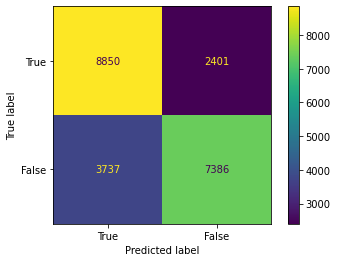

In [49]:
logistic_regression_model = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "LogisticRegression",
            LogisticRegression(
                solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet", l1_ratio=0.777778
            ),
        ),
    ]
)
train_model_and_show_metrics(logistic_regression_model, continuous_dataset, 'cardio')